In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D
import pygame as pg
import matplotlib.image as mpimg
import cv2

pygame 2.0.0 (SDL 2.0.12, python 3.7.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):
    plt.figure(figsize=(10,N))
    num_classes = len(classes)
    for i, y in enumerate(classes):
        idxs = np.flatnonzero(label_data == y)
        idxs = np.random.choice(idxs, N, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(N, num_classes, plt_idx)
            plt.imshow(image_data[idx], cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(y))
    plt.show()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

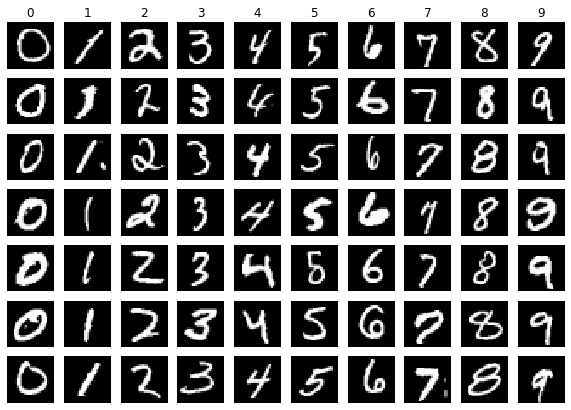

In [4]:
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=7)

In [5]:
X_train = X_train / 255 
X_test = X_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape

In [6]:
conv_model = Sequential()
conv_model.add(Conv2D(24, (3, 3), padding='same', input_shape=input_size))

conv_model.add(Activation('relu'))

conv_model.add(Flatten())

conv_model.add(Dense(64, activation='relu'))

conv_model.add(Dense(10, activation='softmax'))

In [7]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        240       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 24)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1204288   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,205,178
Trainable params: 1,205,178
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1635 - accuracy: 0.9511
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0545 - accuracy: 0.9834
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0138 - accuracy: 0.9957


In [9]:
import random
def airbrush():
    airbrush = True
    cur = pg.mouse.get_pos()
    click = pg.mouse.get_pressed()
    if click[0] == True: # evaluate left button
        pg.draw.circle(sc, WHITE, (cur[0] + random.randrange(2), cur[1] + random.randrange(2)), random.randrange(1, 5))

In [10]:
def get_prediction():
    img = mpimg.imread('digit.png')[..., 1]
    img = cv2.resize(img, dsize=(28, 28))
    img = np.array(img).reshape(1, 28,28,1)
    
    pred = conv_model.predict(img)
    return np.argmax(pred, axis=1)[0]

In [11]:
import pygame as pg
pg.init()
WHITE = (255, 255, 255)
BLACK = (0,0,0)
GREEN = (0,255,0)
sc = pg.display.set_mode((400, 300))
sc.fill(BLACK)
pg.display.update()
f1 = pg.font.Font(None, 36)

play = True
while play:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            pg.quit()
            play = False
        if i.type == pg.MOUSEBUTTONDOWN:
            if i.button == 3:
                pg.image.save(sc, 'digit.png')
                dog_surf = pg.image.load('digit.png')
                pred = get_prediction()
                text1 = f1.render('Предсказание: {0}'.format(pred), True, GREEN)
                sc.blit(text1, (10, 10))
                pg.display.update()
            if i.button == 2:
                sc.fill(BLACK)
                pg.display.update()
    if play:
        airbrush()
        pg.display.update()

Рисуем цифру

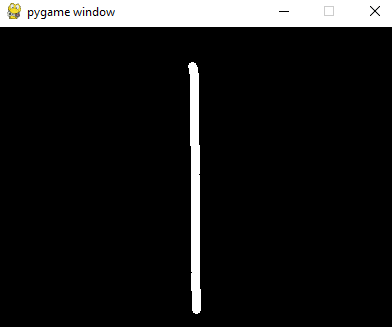

Получаем предсказание

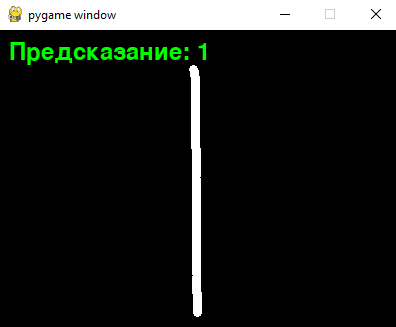

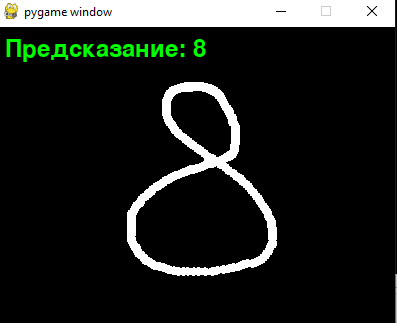